In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# extract input and response variables (housing prices), 
# meaning of each variable is in the link above
feature_num = 7
boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [7]:
X = boston.data[:, :feature_num]
y = boston.target
features = boston.feature_names[:feature_num]
pd.DataFrame(X, columns = features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [8]:
# split into training and testing sets and standardize them
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [12]:
# loop through different penalty score (alpha) and obtain the estimated coefficient (weights)
alphas = 10 ** np.arange(-5.0, 5)
print('different alpha values:', alphas)

# stores the weights of each feature
ridge_weight = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(X_train_std, y_train)
    ridge_weight.append(ridge.coef_)

different alpha values: [1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


In [13]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

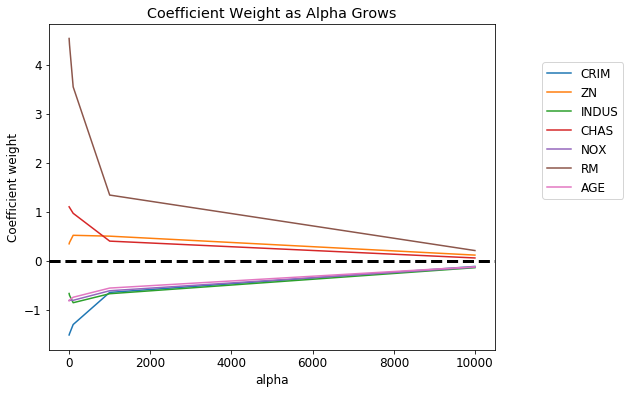

In [14]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

different alpha values: [0.01, 0.1, 1, 5, 8]


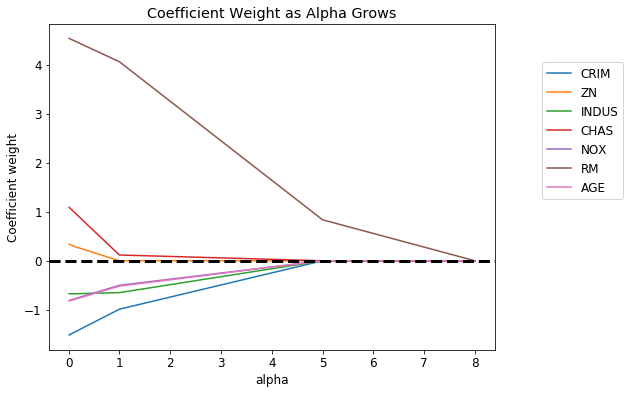

In [15]:
# does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)

In [16]:
def generate_random_data(size, seed):
    """Example of collinear features existing within the data"""
    rstate = np.random.RandomState(seed)
    X_seed = rstate.normal(0, 1, size)
    X1 = X_seed + rstate.normal(0, .1, size)
    X2 = X_seed + rstate.normal(0, .1, size)
    X3 = X_seed + rstate.normal(0, .1, size)
    y = X1 + X2 + X3 + rstate.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
    return X, y

In [18]:
def pretty_print_linear(estimator, names = None, sort = False):
    """A helper method for pretty-printing linear models' coefficients"""
    coef = estimator.coef_
    if names is None:
        names = ['X%s' % x for x in range(1, len(coef) + 1)]

    info = zip(coef, names)
    if sort:
        info = sorted(info, key = lambda x: -np.abs(x[0]))
    
    output = ['{} * {}'.format(round(coef, 3), name) for coef, name in info]
    output = ' + '.join(output)
    return output

In [19]:


# We run the two method 10 times with different random seeds
# confirming that Ridge is more stable than Lasso
size = 100
for seed in range(10):
    print('Random seed:', seed)
    X, y = generate_random_data(size, seed)
 
    lasso = Lasso()
    lasso.fit(X, y)
    print('Lasso model:', pretty_print_linear(lasso))
 
    ridge = Ridge(alpha = 10)
    ridge.fit(X, y)
    print('Ridge model:', pretty_print_linear(ridge))
    print()



Random seed: 0
Lasso model: 0.486 * X1 + 1.508 * X2 + 0.0 * X3
Ridge model: 0.938 * X1 + 1.059 * X2 + 0.877 * X3

Random seed: 1
Lasso model: 1.034 * X1 + 0.626 * X2 + 0.0 * X3
Ridge model: 0.984 * X1 + 1.068 * X2 + 0.759 * X3

Random seed: 2
Lasso model: 1.361 * X1 + 0.0 * X2 + 0.782 * X3
Ridge model: 0.972 * X1 + 0.943 * X2 + 1.085 * X3

Random seed: 3
Lasso model: 0.0 * X1 + 1.008 * X2 + 1.134 * X3
Ridge model: 0.919 * X1 + 1.005 * X2 + 1.033 * X3

Random seed: 4
Lasso model: 0.27 * X1 + 0.0 * X2 + 1.832 * X3
Ridge model: 0.964 * X1 + 0.982 * X2 + 1.098 * X3

Random seed: 5
Lasso model: 0.0 * X1 + 0.035 * X2 + 1.854 * X3
Ridge model: 0.758 * X1 + 1.011 * X2 + 1.139 * X3

Random seed: 6
Lasso model: 0.486 * X1 + 0.0 * X2 + 1.601 * X3
Ridge model: 1.016 * X1 + 0.89 * X2 + 1.091 * X3

Random seed: 7
Lasso model: 0.441 * X1 + 0.036 * X2 + 1.582 * X3
Ridge model: 1.018 * X1 + 1.039 * X2 + 0.901 * X3

Random seed: 8
Lasso model: 0.28 * X1 + 1.974 * X2 + 0.0 * X3
Ridge model: 0.907 * X1 + 

How do we choose the α

parameter?

We can either use a validation set if we have lots of data or use cross validation for smaller data sets. See a quick examples below that uses cross validation with RidgeCV and LassoCV, which is function that performs ridge regression and lasso regression with built-in cross-validation of the alpha parameter.

    From R's glmnet package vignette

    It is known that the ridge penalty shrinks the coefficients of correlated predictors towards each other while the lasso tends to pick one of them and discard the others. The elastic-net penalty mixes these two; if predictors are correlated in groups, an α=0.5 tends to select the groups in or out together. This is a higher level parameter, and users might pick a value upfront, else experiment with a few different values. One use of α is for numerical stability; for example, the elastic net with α=1−ϵ for some small ϵ>0 performs much like the lasso, but removes any degeneracies and wild behavior caused by extreme correlations.

In [22]:
# alpha: array of alpha values to try; must be positive, increase for more regularization
# create an array of alpha values and select the best one with RidgeCV
alpha_range = 10. ** np.arange(-3, 3)
ridge_cv = RidgeCV(alphas = alpha_range, fit_intercept = True)
ridge_cv.fit(X_train_std, y_train)

# examine the coefficients and the errors of the predictions 
# using the best alpha value
y_pred = ridge_cv.predict(X_test_std)
print('coefficients:', ridge_cv.coef_, end = '\n')
print('best alpha:' , ridge_cv.alpha_, end = '\n')
print('\nRSS:', np.sum((y_test - y_pred) ** 2))


coefficients: [-1.49246448  0.37088936 -0.70836731  1.08568161 -0.80970633  4.4075122
 -0.80450999]
best alpha: 10.0

RSS: 4366.3219350034615


In [23]:
# n_alphas: number of alpha values (automatically chosen) to try
# select the best alpha with LassoCV
lasso_cv = LassoCV(n_alphas = 10, fit_intercept = True)
lasso_cv.fit(X_train_std, y_train)

# examine the coefficients and the errors of the predictions 
# using the best alpha value
y_pred = lasso_cv.predict(X_test_std)
print('coefficients:\n', lasso_cv.coef_)
print('best alpha:\n', lasso_cv.alpha_)
print('\nRSS:', np.sum(( y_test - y_pred ) ** 2))

coefficients:
 [-1.5149245   0.34021279 -0.67185865  1.09280671 -0.81071974  4.53310098
 -0.81752854]
best alpha:
 0.005835182912170716

RSS: 4296.025010307989


To sum it up, overfitting is when we build a predictive model that fits the data "too closely", so that it captures the random noise in the data rather than true patterns. As a result, the model predictions will be wrong when applied to new data. Give that our data is sufficiently large and clean, regularization is one good way to prevent overfitting.

# References
- http://ethen8181.github.io/machine-learning/regularization/regularization.html
- https://nbviewer.org/github/justmarkham/DAT8/blob/master/notebooks/20_regularization.ipynb
- http://scott.fortmann-roe.com/docs/BiasVariance.html
- http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/
- https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/l2-regularization